# Lab8. Audio corpus creation and binary classification using DNN

### Name    :  SAMIDURAI S
### Roll No : 215229134

### 1. Create a Dataset

Dataset is created

### 2. Read the Audio

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob

from IPython.display import Audio
import IPython.display as ipd

import librosa
import librosa.display

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [6]:
paths = 'pong/pong 1.wav'

Audio(paths)

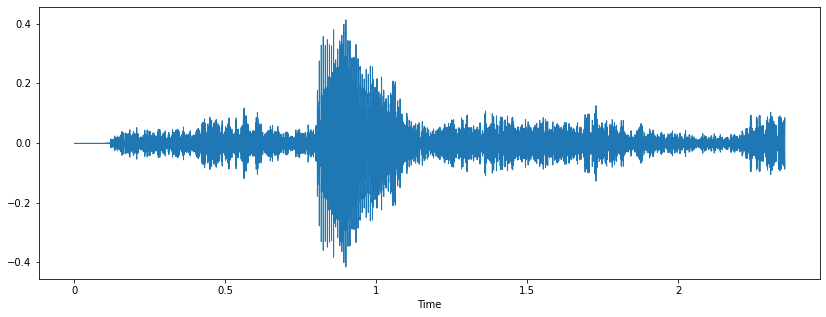

In [7]:
data, sample_rate = librosa.load(paths)
plt.figure(figsize=(14,5))

librosa.display.waveshow(data, sr=sample_rate)
plt.show()

In [8]:
sample_rate

22050

In [9]:
data

array([0.        , 0.        , 0.        , ..., 0.07759045, 0.07939196,
       0.        ], dtype=float32)

In [10]:
stftt = librosa.feature.chroma_stft(y=data, sr=sample_rate)
stftt.shape

(12, 102)

In [11]:
stftt

array([[0.        , 0.        , 0.        , ..., 0.12795319, 0.20123957,
        0.7639299 ],
       [0.        , 0.        , 0.        , ..., 0.5053208 , 0.31686118,
        0.6659816 ],
       [0.        , 0.        , 0.        , ..., 0.8312789 , 0.6433129 ,
        0.88870406],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0961052 , 0.133403  ,
        0.30965343],
       [0.        , 0.        , 0.        , ..., 0.16491108, 0.21404304,
        0.43014374],
       [0.        , 0.        , 0.        , ..., 0.1067813 , 0.15245482,
        0.6130986 ]], dtype=float32)

In [12]:
df = pd.read_csv(r'Audio.csv')
df.head()

,File_Name,Class_ID,Class
0,ping/ping-1.wav,0,ping
1,ping/ping-2.wav,0,ping
2,ping/ping-3.wav,0,ping
3,ping/ping-4.wav,0,ping
4,ping/ping-5.wav,0,ping


In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    stftt_scaled_features = np.mean(stftt_features.T, axis=0)
    return stftt_scaled_features

In [14]:
extracted_features=[]

for index_num, row in tqdm(df.iterrows()):
    file_name = row[0]
    final_class_labels = row[1]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

20it [00:14,  1.37it/s]


In [15]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.3849152, 0.42305866, 0.4277966, 0.38940728,...",0
1,"[0.50621146, 0.49957237, 0.49423355, 0.5272409...",0
2,"[0.51268566, 0.4320431, 0.4468842, 0.40052024,...",0
3,"[0.42270818, 0.42589417, 0.3794657, 0.3483247,...",0
4,"[0.43291238, 0.37962413, 0.3753712, 0.49448764...",0


### 3. Split the dataset

In [16]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 12)
(15,)
(5, 12)
(5,)


### 4. Train a Neural Network Model

In [19]:
model = Sequential()

model.add(Dense(128, activation='tanh', input_shape=(12,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train, batch_size=132, epochs=50 , verbose=2, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-traina

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("loss ", score[0])
print("accuracy ",score[1])

loss  0.20610079169273376
accuracy  0.4000000059604645


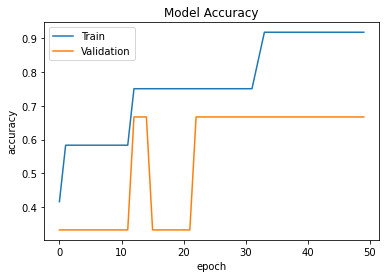

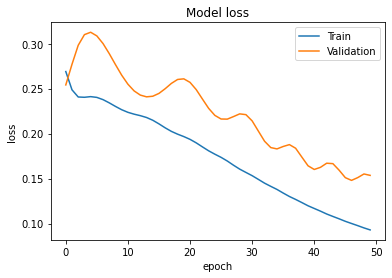

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 5. Run different Neural Network models

In [27]:
batch=132
def c_model(node):
    model=Sequential()
    model.add(Dense(128, activation='tanh', input_shape=(12,)))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
    history=model.fit(X_train, y_train, batch_size=batch, epochs=50 , verbose=2,validation_split=0.2)
    score=model.evaluate(X_test,y_test,verbose=0)
    print("loss ", score[0])
    print("accuracy ",score[1])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 dense_25 (Dense)            (None, 8)                 1032      
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-traina

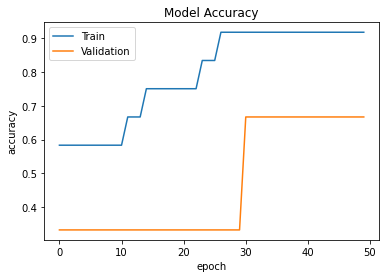

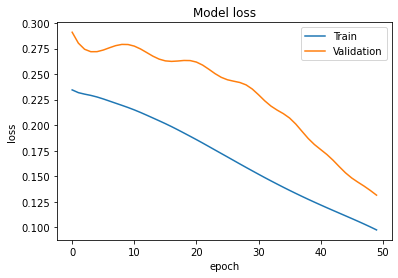

In [28]:
c_model(8)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1664      
                                                                 
 dense_31 (Dense)            (None, 16)                2064      
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-traina

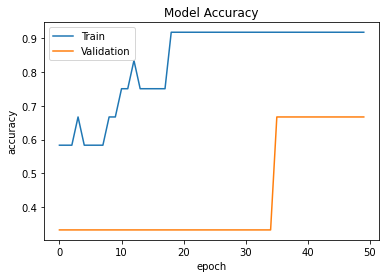

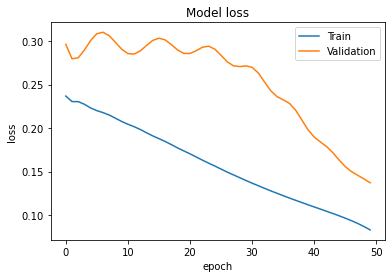

In [29]:
c_model(16)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1664      
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 8)                 264       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,177
Trainable params: 8,177
Non-traina

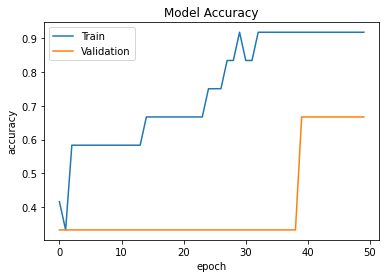

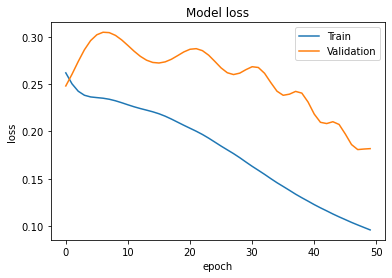

In [30]:
c_model(32)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               1664      
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 8)                 520       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,769
Trainable params: 18,769
Non-trai

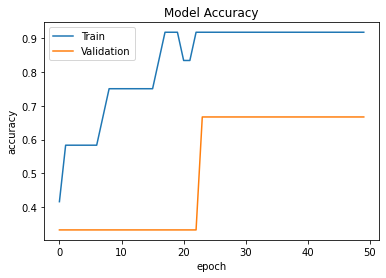

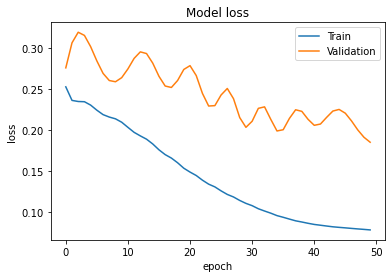

In [31]:
c_model(64)

In [32]:
def c_layer(n):
    model=Sequential()
    
    model.add(Dense(128, activation='tanh', input_shape=(12,)))
    
    for i in range(0,n):
        model.add(Dense(32, activation='tanh'))

    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
    history=model.fit(X_train, y_train, batch_size=batch_size, epochs=50 , verbose=2,validation_split=0.2)
    score=model.evaluate(X_test,y_test,verbose=0)
    
    print("loss ", score[0])
    print("accuracy ",score[1])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1664      
                                                                 
 dense_49 (Dense)            (None, 32)                4128      
                                                                 
 dense_50 (Dense)            (None, 32)                1056      
                                                                 
 dense_51 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,881
Trainable params: 6,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 2s - loss: 0.2992 - accuracy: 0.4167 - val_loss: 0.2383 - val_accuracy: 0.6667 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.2767 - accuracy: 0.4167 - val_loss: 0

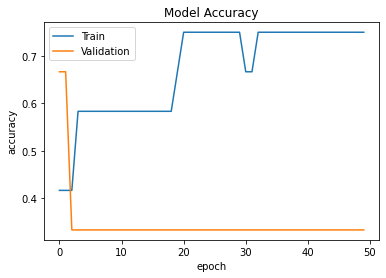

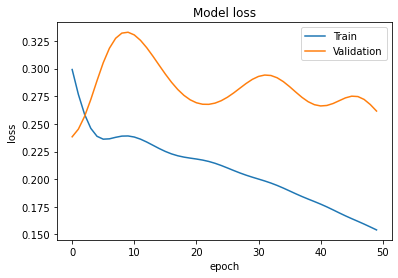

In [33]:
c_layer(2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               1664      
                                                                 
 dense_53 (Dense)            (None, 32)                4128      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dense_56 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 2s - loss: 0.2632 - accuracy: 0.416

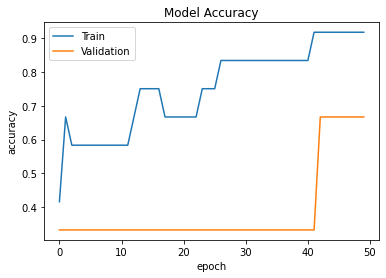

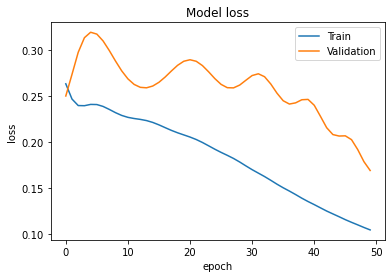

In [34]:
c_layer(3)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               1664      
                                                                 
 dense_58 (Dense)            (None, 32)                4128      
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 1)               

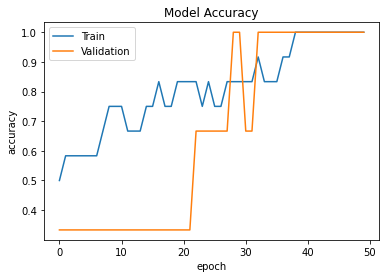

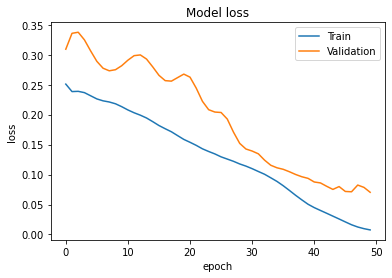

In [35]:
c_layer(5)